In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'
#需要安装simhei.ttf字体,装完之后要重启这个notebook文件才行
#参考https://www.zhihu.com/question/25404709/answer/170849168
#指定图形的字体  
font = {'color'  : 'darkred',  
        'weight' : 'normal',  
        'size'   : 16  
        }  

DATE       object
VALUE     float64
VALUE2    float64
dtype: object
DATE      datetime64[ns]
VALUE            float64
VALUE2           float64
dtype: object


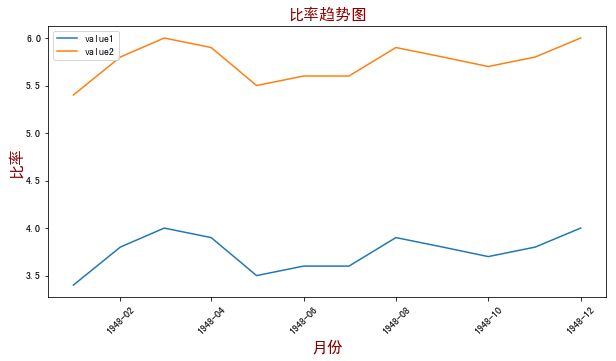

In [110]:
## 画一个折线图
ur = pd.read_csv('unrate.csv')
print(ur.dtypes)
## 转成时间格式
ur['DATE'] = pd.to_datetime(ur['DATE'])
print(ur.dtypes)
## 读取头部12个月数据
ur12 = ur.loc[0:11]
## x轴:DATE,y轴:VALUE
plt.figure(figsize=(10,5))
plt.plot(ur12['DATE'],ur12['VALUE'],label='value1') # 折线1
plt.plot(ur12['DATE'],ur12['VALUE2'],label='value2') # 折线2
plt.xticks(rotation=45) # 控制x轴数据旋转角度
plt.xlabel(u'月份',fontdict=font)
plt.ylabel(u'比率',fontdict=font)
plt.title(u'比率趋势图',fontdict=font)
plt.legend(loc=2) # 图例,loc是位置
plt.show()

          VALUE  VALUE2
DATE                   
1948/1/1    3.4     5.4
1948/2/1    3.8     5.8
1948/3/1    4.0     6.0
1948/4/1    3.9     5.9
1948/5/1    3.5     5.5
VALUE     float64
VALUE2    float64
dtype: object
['1948/1/1', '1948/2/1', '1948/3/1', '1948/4/1', '1948/5/1', '1948/6/1', '1948/7/1', '1948/8/1', '1948/9/1', '1948/10/1', '1948/11/1', '1948/12/1']
DATE    1948/1/1  1948/2/1  1948/3/1  1948/4/1  1948/5/1  1948/6/1  1948/7/1  \
VALUE        3.4       3.8       4.0       3.9       3.5       3.6       3.6   
VALUE2       5.4       5.8       6.0       5.9       5.5       5.6       5.6   

DATE    1948/8/1  1948/9/1  1948/10/1  1948/11/1  1948/12/1  
VALUE        3.9       3.8        3.7        3.8        4.0  
VALUE2       5.9       5.8        5.7        5.8        6.0  
[ 3.4  3.8  4.   3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4. ]
[ 5.4  5.8  6.   5.9  5.5  5.6  5.6  5.9  5.8  5.7  5.8  6. ]


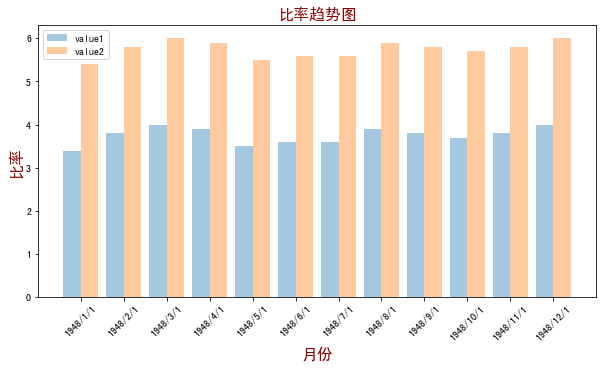

In [85]:
# 柱状图，纵向的
ur = pd.read_csv('unrate.csv',index_col='DATE') # DATE列为索引
print(ur.head())
print(ur.dtypes)
## 读取头部12个月数据，并转置,是月份为列名
ur12 = ur.loc['1948/1/1':'1948/12/1'].T
print(ur12.columns.tolist())
print(ur12.head())
cols = ur12.columns.tolist()
bar_left = np.arange(len(cols)) ## 控制柱子的位置
bar_width = 0.4 # 柱子宽度
opacity = 0.4
bar_height_value = ur12.loc['VALUE',cols].values
bar_height_value2 = ur12.loc['VALUE2',cols].values
print(bar_height_value)
print(bar_height_value2)

plt.figure(figsize=(10,5))
plt.bar(bar_left-bar_width/2,bar_height_value,bar_width,alpha=opacity,label='value1') # 柱状1
plt.bar(bar_left+bar_width/2,bar_height_value2,bar_width,alpha=opacity,label='value2') # 柱状2
plt.xticks(bar_left,cols,rotation=45) # 控制x轴数据旋转角度
plt.xlabel(u'月份',fontdict=font)
plt.ylabel(u'比率',fontdict=font)
plt.title(u'比率趋势图',fontdict=font)
plt.legend(loc=2) # 图例,loc是位置
plt.show()

          VALUE  VALUE2
DATE                   
1948/1/1    3.4     5.4
1948/2/1    3.8     5.8
1948/3/1    4.0     6.0
1948/4/1    3.9     5.9
1948/5/1    3.5     5.5
VALUE     float64
VALUE2    float64
dtype: object
['1948/1/1', '1948/2/1', '1948/3/1', '1948/4/1', '1948/5/1', '1948/6/1', '1948/7/1', '1948/8/1', '1948/9/1', '1948/10/1', '1948/11/1', '1948/12/1']
DATE    1948/1/1  1948/2/1  1948/3/1  1948/4/1  1948/5/1  1948/6/1  1948/7/1  \
VALUE        3.4       3.8       4.0       3.9       3.5       3.6       3.6   
VALUE2       5.4       5.8       6.0       5.9       5.5       5.6       5.6   

DATE    1948/8/1  1948/9/1  1948/10/1  1948/11/1  1948/12/1  
VALUE        3.9       3.8        3.7        3.8        4.0  
VALUE2       5.9       5.8        5.7        5.8        6.0  
[ 3.4  3.8  4.   3.9  3.5  3.6  3.6  3.9  3.8  3.7  3.8  4. ]
[ 5.4  5.8  6.   5.9  5.5  5.6  5.6  5.9  5.8  5.7  5.8  6. ]


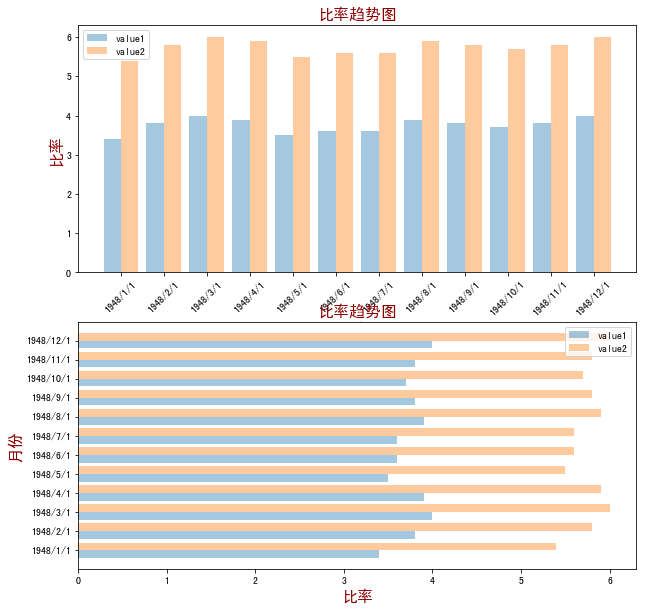

In [118]:
# 柱状图，纵向和横向的
ur = pd.read_csv('unrate.csv',index_col='DATE') # DATE列为索引
print(ur.head())
print(ur.dtypes)
## 读取头部12个月数据，并转置,是月份为列名
ur12 = ur.loc['1948/1/1':'1948/12/1'].T
print(ur12.columns.tolist())
print(ur12.head())
cols = ur12.columns.tolist()
bar_left = np.arange(len(cols)) ## 控制柱子的位置
bar_width = 0.4 # 柱子宽度
opacity = 0.4
bar_height_value = ur12.loc['VALUE',cols].values
bar_height_value2 = ur12.loc['VALUE2',cols].values
print(bar_height_value)
print(bar_height_value2)

fig = plt.figure(figsize=(10,10))

as1 = fig.add_subplot(2,1,1) # 添加子图,位置在2行1列的第一个,纵向的
as1.bar(bar_left-bar_width/2,bar_height_value,bar_width,alpha=opacity,label='value1') # 柱状1
as1.bar(bar_left+bar_width/2,bar_height_value2,bar_width,alpha=opacity,label='value2') # 柱状2
as1.set_xticks(bar_left) # 控制x轴数据旋转角度
as1.set_xticklabels(cols,rotation=45) # 控制x轴数据旋转角度
as1.set_xlabel(u'月份',fontdict=font)
as1.set_ylabel(u'比率',fontdict=font)
as1.set_title(u'比率趋势图',fontdict=font)
as1.legend(loc=2) # 图例,loc是位置

as2 = fig.add_subplot(2,1,2) # 添加子图,位置在2行1列的第二个,横向的
as2.barh(bar_left-bar_width/2,bar_height_value,bar_width,alpha=opacity,label='value1') # 柱状1
as2.barh(bar_left+bar_width/2,bar_height_value2,bar_width,alpha=opacity,label='value2') # 柱状2
as2.set_yticks(bar_left) # 控制x轴数据旋转角度
as2.set_yticklabels(cols) # 控制x轴数据旋转角度
as2.set_ylabel(u'月份',fontdict=font)
as2.set_xlabel(u'比率',fontdict=font)
as2.set_title(u'比率趋势图',fontdict=font)
as2.legend(loc=1) # 图例,loc是位置
plt.show()

['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference']
                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0      3.7           4.3         ...                 3.9            3.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5

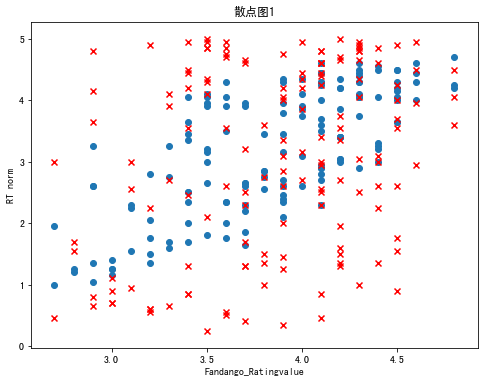

In [129]:
## 散点图
fs = pd.read_csv('fandango_scores.csv')
print(fs.columns.tolist())
print(fs.head(1))
plt.figure(figsize=(8,6))
# x轴:Fandango_Ratingvalue，y轴:RT norm
plt.scatter(fs['Fandango_Ratingvalue'],fs['RT_user_norm']) # 散点1
plt.scatter(fs['Fandango_Ratingvalue'],fs['RT_norm'],marker='x',c='r') # 散点2
plt.xlabel('Fandango_Ratingvalue')
plt.ylabel('RT norm')
plt.title(u'散点图1')
plt.show()

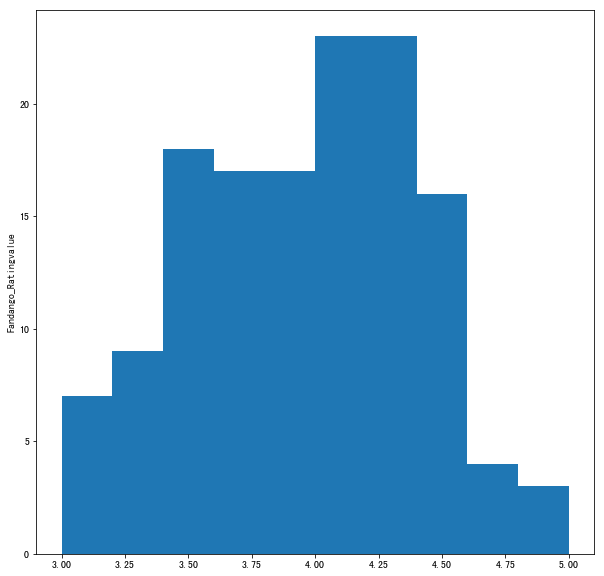

In [142]:
# 直方图
fs = pd.read_csv('fandango_scores.csv')
plt.figure(figsize=(10,10))
plt.hist(fs['Fandango_Ratingvalue'],range=(3,5),bins=10)
plt.ylabel('Fandango_Ratingvalue')
plt.show()

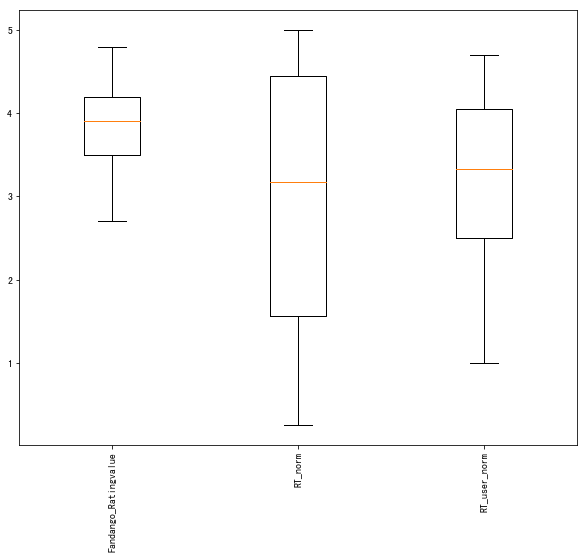

In [156]:
# 盒图，最大值、最小值、中位数、75位数、25位数
fs = pd.read_csv('fandango_scores.csv')
plt.figure(figsize=(10,8))
cols = ['Fandango_Ratingvalue','RT_norm','RT_user_norm']
plt.boxplot(fs[cols].values)
plt.xticks(np.arange(len(cols))+1,cols,rotation=90)
plt.show()

In [150]:
print(help(plt))

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot - Provides a MATLAB-like plotting framework.

DESCRIPTION
    :mod:`~matplotlib.pylab` combines pyplot with numpy into a single namespace.
    This is convenient for interactive work, but for programming it
    is recommended that the namespaces be kept separate, e.g.::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1);
        y = np.sin(x)
        plt.plot(x, y)

FUNCTIONS
    acorr(x, hold=None, data=None, **kwargs)
        Plot the autocorrelation of `x`.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        hold : boolean, optional, *deprecated*, default: True
        
        detrend : callable, optional, default: `mlab.detrend_none`
            x is detrended by the `detrend` callable. Default is no
            normalization.
        
        normed : boolean, optional, default: True
            